In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [200]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
df = pd.read_csv(dataset_url)
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [202]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [203]:
all_columns = pd.read_csv(dataset_url).columns.tolist()
factor_columns = [
    'MonsoonIntensity',
    'TopographyDrainage',
    'RiverManagement',
    'Deforestation',
    'Urbanization',
    'ClimateChange',
    'DamsQuality',
    'Siltation',
    'AgriculturalPractices',
    'Encroachments',
    'IneffectiveDisasterPreparedness',
    'DrainageSystems',
    'CoastalVulnerability',
    'Landslides',
    'Watersheds',
    'DeterioratingInfrastructure',
    'PopulationScore',
    'WetlandLoss',
    'InadequatePlanning',
    'PoliticalFactors',
    'FloodProbability'
]

non_factor_columns = [col for col in all_columns if col not in factor_columns]

print("Factor columns:")
print(factor_columns)
print("\nNon-factor columns:")
print(non_factor_columns)

Factor columns:
['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

Non-factor columns:
['id']


In [204]:
df = df[factor_columns]
df.head()
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


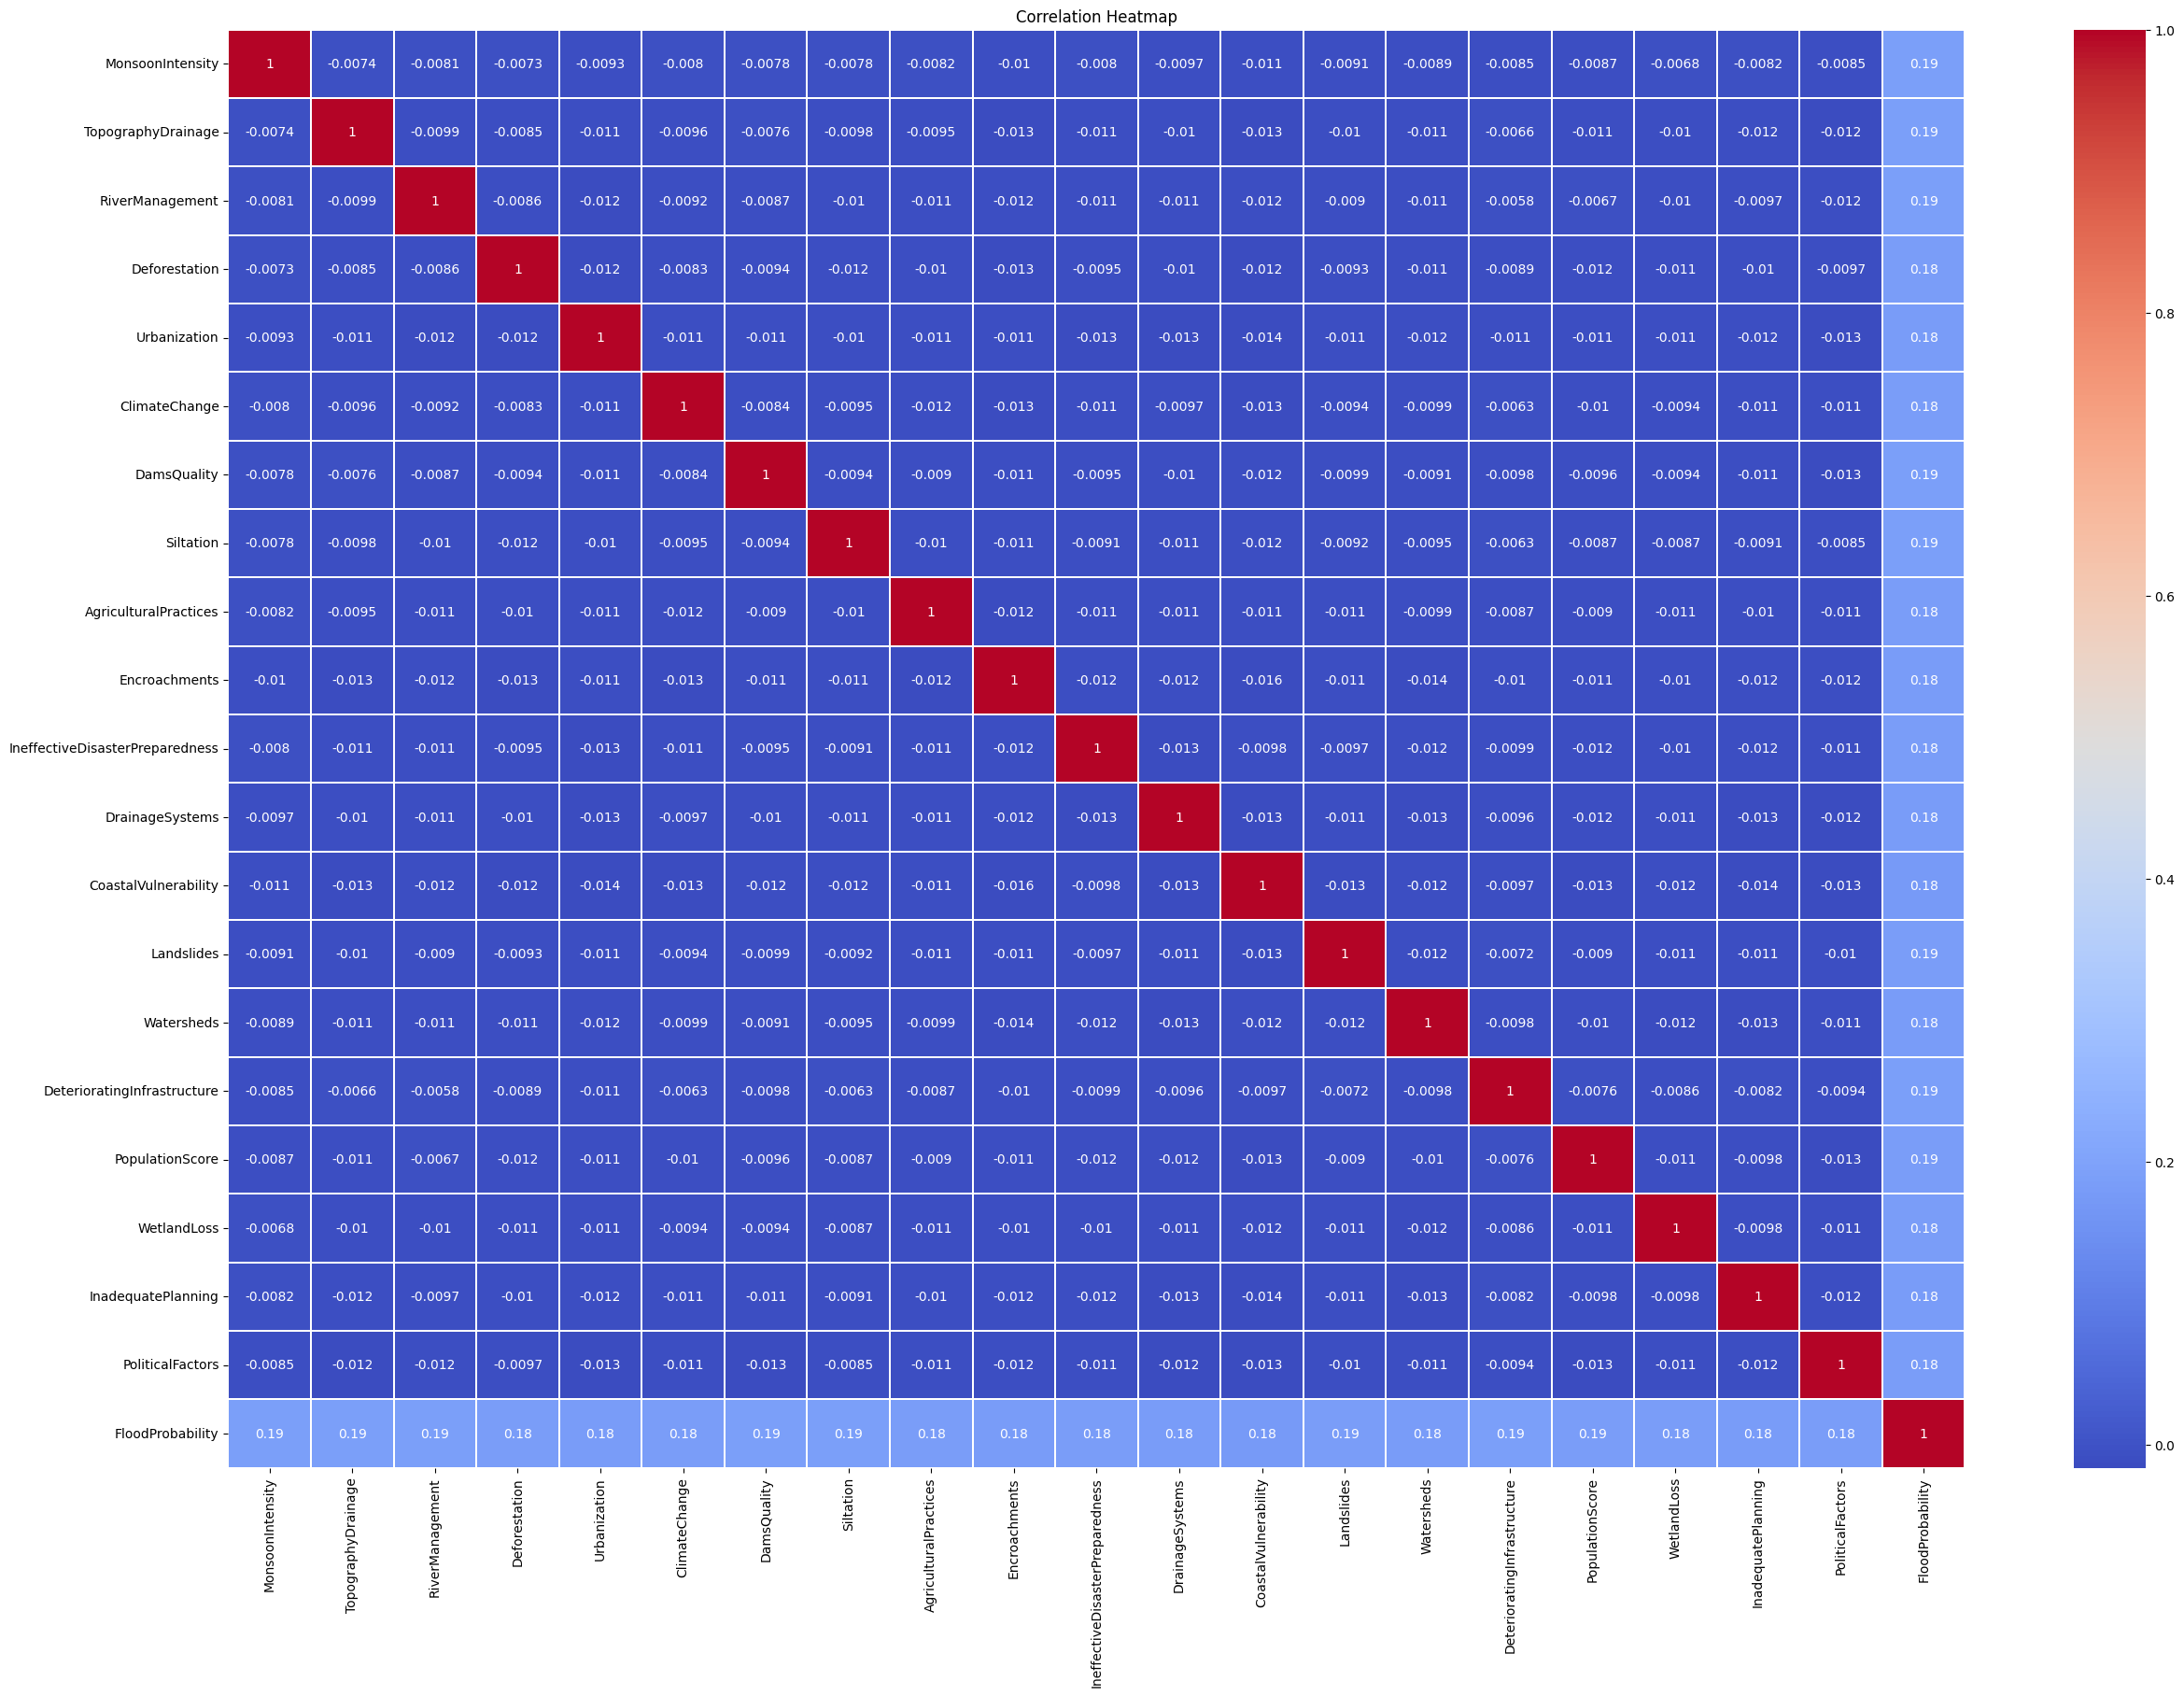

In [205]:
import seaborn as sns
plt.figure(figsize=(30,20))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

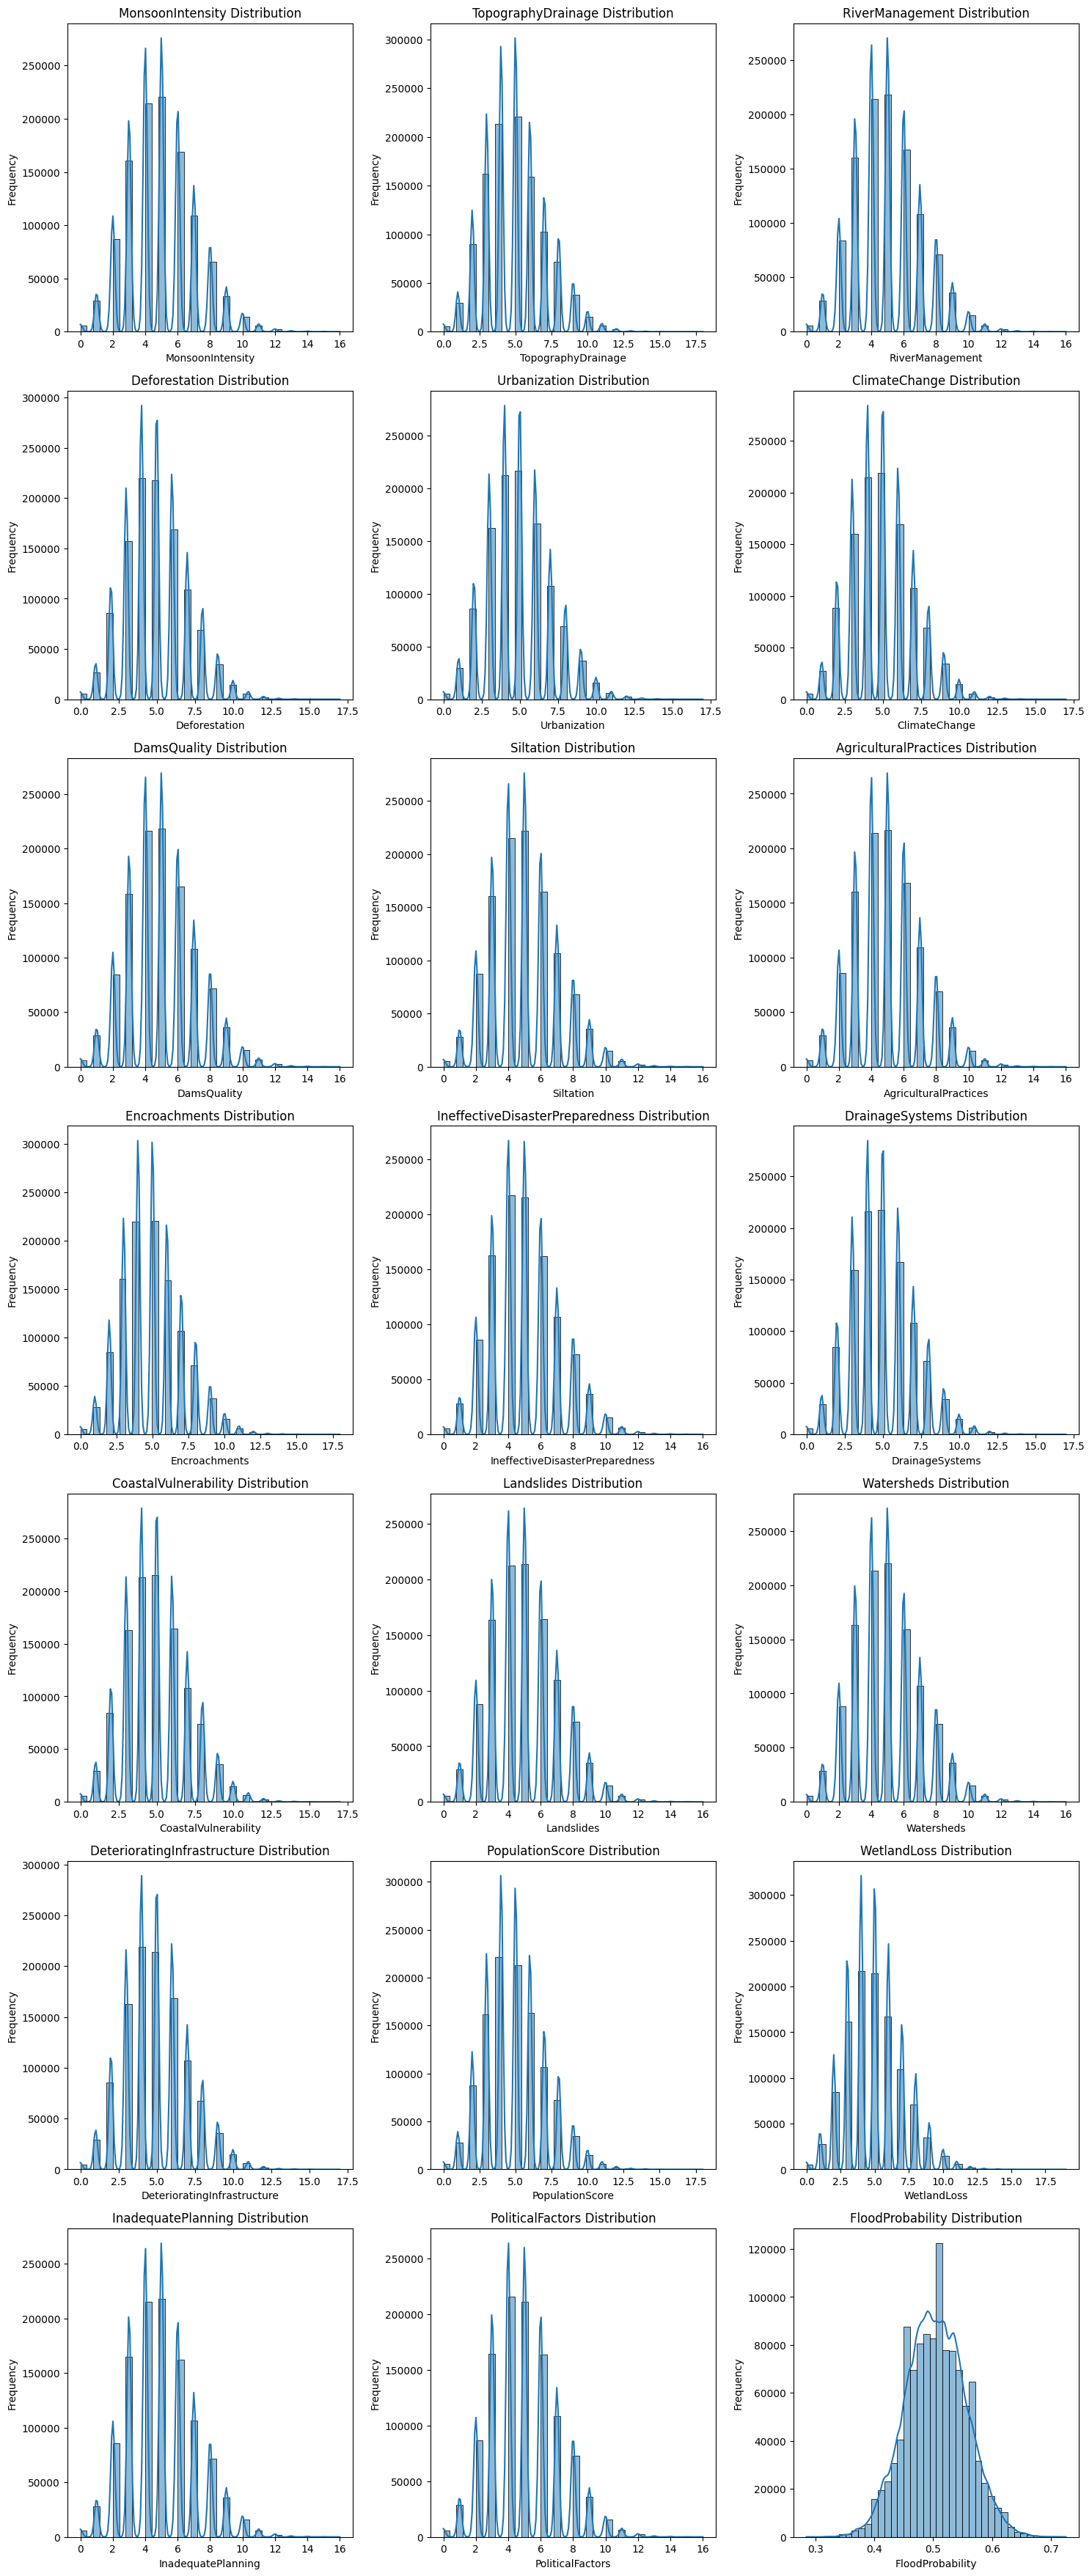

In [206]:
nrows = (len(df.columns) + 2)
ncols = min(len(df.columns), 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

if nrows == 1:
    axes = [axes]

for i, col in enumerate(df.columns):
    row_index = i // ncols
    col_index = i % ncols
    ax = axes[row_index][col_index]
    sns.histplot(df[col],bins=40, kde=True, ax=ax)
    ax.set_title(col + ' Distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)

if nrows * ncols > len(df.columns):
    for i in range(len(df.columns), nrows * ncols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show();

In [207]:
X = df.drop(columns= ['FloodProbability'])
y = df['FloodProbability']

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.85,random_state=0)

In [209]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [210]:
y_pred = model.predict(X_test)

In [211]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

R-squared score: 0.8445016495570807


In [212]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

In [213]:
y_pred = model.predict(X_test)

In [217]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.8445016495570807
Mean Squared Error: 0.0004046515121230423


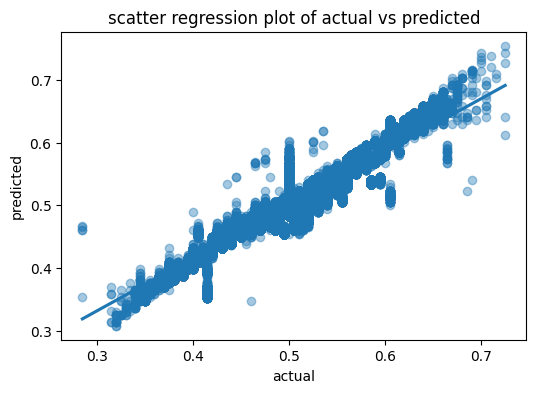

In [218]:
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=y_pred, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [224]:
display(submission_df.head())

,id,FloodProbability
0,1117957,0.573623
1,1117958,0.455277
2,1117959,0.454727
3,1117960,0.466198
4,1117961,0.466050


In [225]:
id = testdata['id']
dt = testdata.drop('id', axis=1)

y_pred = model.predict(dt)

submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
